In [1]:
# importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
pd.set_option('display.max_colwidth', None)
# sklearn libraries

from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV , cross_val_score , train_test_split
from sklearn.pipeline import Pipeline

# Preprocessing libraries
from sklearn.preprocessing import MinMaxScaler , StandardScaler

# Metrics for model evaluation
from sklearn.metrics import mean_squared_error , r2_score

# Models include - Linear Regression , Lasso , Random Forest 
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.ensemble import RandomForestRegressor

print('Everything is Loaded Successfully!')

Everything is Loaded Successfully!


1. Load the dataset

In [3]:
X , y = load_diabetes(return_X_y=True)
diabetes_df = pd.DataFrame(load_diabetes().data , columns = load_diabetes().feature_names)
diabetes_df['blood_glucose'] = y

diabetes_df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,blood_glucose
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


2. Statistical view of the dataset

In [4]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,blood_glucose
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [57]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            442 non-null    float64
 1   sex            442 non-null    float64
 2   bmi            442 non-null    float64
 3   bp             442 non-null    float64
 4   s1             442 non-null    float64
 5   s2             442 non-null    float64
 6   s3             442 non-null    float64
 7   s4             442 non-null    float64
 8   s5             442 non-null    float64
 9   s6             442 non-null    float64
 10  blood_glucose  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


3. Detecting and treating missing values in the dataset

In [5]:
diabetes_df.isna().sum()

age              0
sex              0
bmi              0
bp               0
s1               0
s2               0
s3               0
s4               0
s5               0
s6               0
blood_glucose    0
dtype: int64

4. Visualizing the feature correlation matrix using a heatmap

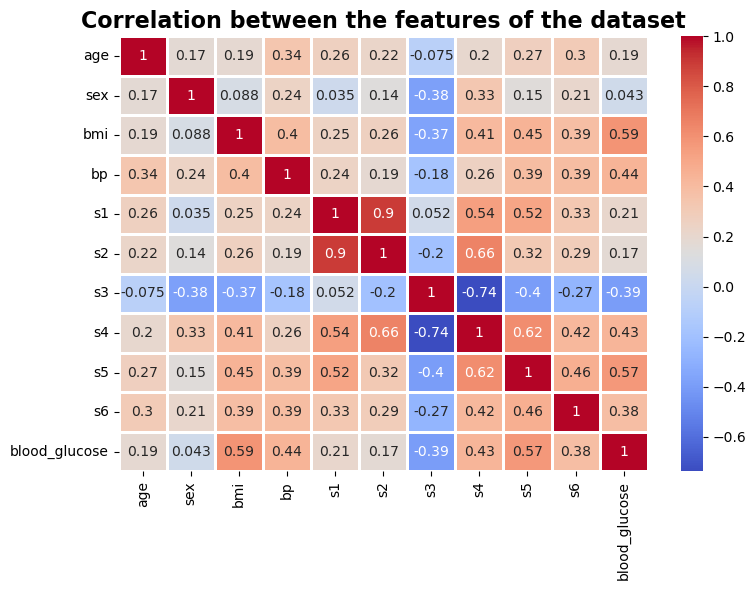



Top 5 Positive Correlations:
 s1             s2     0.896663
s2             s4     0.659817
s4             s5     0.617859
blood_glucose  bmi    0.586450
               s5     0.565883
dtype: float64

Top 5 Negative Correlations:
 s3             s4    -0.738493
               s5    -0.398577
blood_glucose  s3    -0.394789
s3             sex   -0.379090
bmi            s3    -0.366811
dtype: float64


In [59]:
corr_matrix = diabetes_df.corr(numeric_only = True)

fig , axs = plt.subplots(1,1 , figsize=(8 , 6))
sns.heatmap(corr_matrix , cmap = 'coolwarm' , annot=True , linewidth = 2)
plt.title('Correlation between the features of the dataset' , fontweight = 'bold' , fontsize = 16)
plt.tight_layout()
plt.show()

print('\n')
corr_no_diag = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))

# Convert matrix to pairs
corr_pairs = corr_no_diag.unstack().dropna()

# Remove duplicate pairs like (A,B) and (B,A)
corr_pairs = corr_pairs[
    corr_pairs.index.get_level_values(0) <
    corr_pairs.index.get_level_values(1)
]

# Top 5 positive correlations
top_pos = corr_pairs.sort_values(ascending=False).head(5)

# Top 5 negative correlations
top_neg = corr_pairs.sort_values().head(5)

print("Top 5 Positive Correlations:\n", top_pos)
print("\nTop 5 Negative Correlations:\n", top_neg)

In [61]:
target_corr = diabetes_df.corr()['blood_glucose'].sort_values(ascending = False)
print('Evaluating the relationship between the target variable and input features:')
for feature, value in target_corr.items():
    print(f"blood_glucose : {feature} = {value:.4f}")

Evaluating the relationship between the target variable and input features:
blood_glucose : blood_glucose = 1.0000
blood_glucose : bmi = 0.5865
blood_glucose : s5 = 0.5659
blood_glucose : bp = 0.4415
blood_glucose : s4 = 0.4305
blood_glucose : s6 = 0.3825
blood_glucose : s1 = 0.2120
blood_glucose : age = 0.1879
blood_glucose : s2 = 0.1741
blood_glucose : sex = 0.0431
blood_glucose : s3 = -0.3948


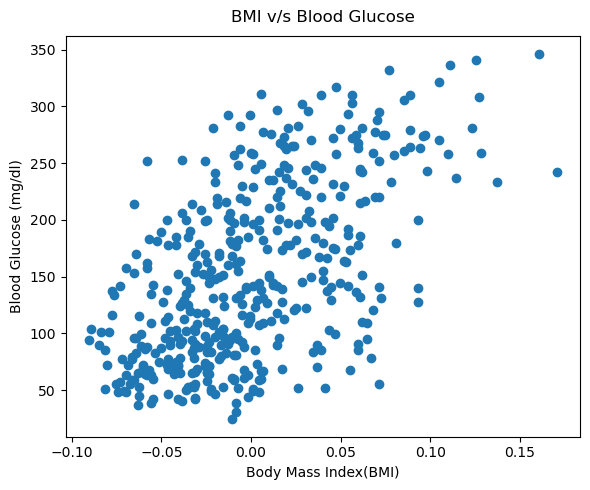

In [8]:
fig , axs = plt.subplots(1,1 , figsize=(6 , 5))
axs.scatter(x = diabetes_df['bmi'] , y = diabetes_df['blood_glucose'])
axs.set_title('BMI v/s Blood Glucose' , pad = 10)
axs.set_ylabel('Blood Glucose (mg/dl)')
axs.set_xlabel('Body Mass Index(BMI)')

plt.tight_layout()
plt.show()

5. Comparative model selection among Linear Regression, Lasso, and Random Forest

In [14]:
# Partitioning the dataset into training and testing subsets 

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state = 42)
print('80% of data is divided into training set as' , X_train.shape)
print('20% of data is for testing set as' , X_test.shape)

80% of data is divided into training set as (353, 10)
20% of data is for testing set as (89, 10)


In [10]:
# Configuring feature scaling strategies

scalars = {
    'standard' : StandardScaler() , 
     'MinMax' : MinMaxScaler()
}

In [17]:
#Structuring candidate regression models and hyperparameters in a configuration dictionary
models = {
        'Linear' : {
            'model' : LinearRegression() ,
             'params' : {}
        },
        'Lasso' : {
            'model' : Lasso(max_iter = 10000),
            'params' : {
                'model__alpha' : [0.001 , 0.01 , 0.1 , 1 , 10]
            }
        },
        'Random Forest' : {
            'model' : RandomForestRegressor(random_state=42),
            'params' : {
                'model__n_estimators' : [200, 400, 600],
                'model__max_depth' : [None, 5, 10, 20],
                'model__min_samples_split' : [2, 5, 10],
                'model__min_samples_leaf' : [1, 2, 4]
        
            }
        }    
    }

In [18]:
# Performing hyperparameter optimization using GridSearchCV
results = []

for scalar_name , scalar in scalars.items():
    for model_name , config in models.items():

        pipe = Pipeline([
            ('scalar' , scalar) ,
            ('model' , config['model'])
        ])

        grid = GridSearchCV(
            estimator= pipe,
            param_grid= config['params'],
            scoring="neg_root_mean_squared_error",
            n_jobs=-1,
            cv = 5
        )

        grid.fit(X_train , y_train)

        best_model = grid.best_estimator_
        
        y_pred = best_model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test , y_pred))
        r2 = r2_score(y_test , y_pred)

        results.append({
            'scalar' : scalar_name,
            'model' : model_name,
            'rmse' : rmse,
            'r2_score':r2,
            'Best parameters' : grid.best_params_
        })

In [53]:
# Evaluating and comparing model performance metrics
results_df = pd.DataFrame(results)
results_df.sort_values(by = 'rmse' , inplace = True)
results_df

,scalar,model,rmse,r2_score,Best parameters
1,standard,Lasso,53.146666,0.466877,{'model__alpha': 1}
2,standard,Random Forest,53.401423,0.461753,"{'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 600}"
5,MinMax,Random Forest,53.419398,0.461391,"{'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 600}"
4,MinMax,Lasso,53.768513,0.454328,{'model__alpha': 0.01}
0,standard,Linear,53.853446,0.452603,{}
3,MinMax,Linear,53.853446,0.452603,{}


6. Retraining the selected optimal model on the complete dataset using the best hyperparameters

In [6]:
final_pipe = Pipeline([
    ('standard' , StandardScaler()),
    ('model' , Lasso(alpha = 1, max_iter = 10000))
])

final_pipe.fit(X , y)
print('Model trained succesfully!')
print('\n')
print('Pipeline of the model')
final_pipe

Model trained succesfully!


Pipeline of the model


Pipeline(steps=[('standard', StandardScaler()),
                ('model', Lasso(alpha=1, max_iter=10000))])

7. Performing cross-validation to estimate generalization performance

In [56]:
r2_scores = cross_val_score(final_pipe, X , y , cv = 10 , scoring = 'r2')
rmse_scores = -cross_val_score(final_pipe , X, y , cv = 10 , scoring='neg_root_mean_squared_error')

print("Mean R² :", round(r2_scores.mean(),2))
print("Mean RMSE:", round(rmse_scores.mean() , 2))

Mean R² : 0.46
Mean RMSE: 54.33


In [69]:
# Model Interpretation and Feature Contribution Analysis
pd.Series(
    final_pipe.named_steps["model"].coef_,
    index=load_diabetes().feature_names
).sort_values()

s3    -10.622799
sex    -9.319413
s1     -4.838928
age    -0.000000
s2     -0.000000
s4      0.000000
s6      2.562130
bp     14.088706
s5     24.420811
bmi    24.831276
dtype: float64

8. Persisting the Trained Model for Future Inference and Deployment

In [71]:
import joblib
joblib.dump(final_pipe, "diabetes_lasso_model.pkl")
print('Model Saved Successfully')

Model Saved Successfully


9.Conclusion